In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv("./telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91,11.01,10.0,3.0,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103,11.45,13.7,3.0,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104,7.32,12.2,5.0,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89,8.86,6.6,7.0,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113.0,28.34,148.3,122.0,NaN,186.9,121,8.41,10.1,3.0,2.73,3,False


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3337 non-null   object 
 1   Account length          3337 non-null   int64  
 2   Area code               3337 non-null   int64  
 3   International plan      3336 non-null   object 
 4   Voice mail plan         3334 non-null   object 
 5   Number vmail messages   3337 non-null   int64  
 6   Total day minutes       3330 non-null   float64
 7   Total day calls         3335 non-null   float64
 8   Total day charge        3332 non-null   float64
 9   Total eve minutes       3334 non-null   float64
 10  Total eve calls         3336 non-null   float64
 11  Total eve charge        3327 non-null   float64
 12  Total night minutes     3331 non-null   float64
 13  Total night calls       3337 non-null   int64  
 14  Total night charge      3335 non-null   

In [10]:
df.isnull().sum()

State                      0
Account length             0
Area code                  0
International plan         1
Voice mail plan            3
Number vmail messages      0
Total day minutes          7
Total day calls            2
Total day charge           5
Total eve minutes          3
Total eve calls            1
Total eve charge          10
Total night minutes        6
Total night calls          0
Total night charge         2
Total intl minutes         1
Total intl calls           1
Total intl charge          1
Customer service calls     0
Churn                      8
dtype: int64

In [11]:
df.shape

(3337, 20)

In [14]:
target_dist = df["Churn"].value_counts().reset_index(name="Count")
target_dist

,index,Count
0,False,2846
1,True,483


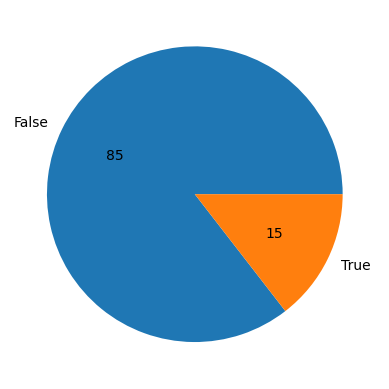

In [26]:
plt.pie(
    target_dist["Count"], 
    labels=target_dist["index"],
    autopct= "%.f"
    )
plt.show()

In [27]:
## Data is imbalanced. 85% data for False class 15% for True

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3337 non-null   object 
 1   Account length          3337 non-null   int64  
 2   Area code               3337 non-null   int64  
 3   International plan      3336 non-null   object 
 4   Voice mail plan         3334 non-null   object 
 5   Number vmail messages   3337 non-null   int64  
 6   Total day minutes       3330 non-null   float64
 7   Total day calls         3335 non-null   float64
 8   Total day charge        3332 non-null   float64
 9   Total eve minutes       3334 non-null   float64
 10  Total eve calls         3336 non-null   float64
 11  Total eve charge        3327 non-null   float64
 12  Total night minutes     3331 non-null   float64
 13  Total night calls       3337 non-null   int64  
 14  Total night charge      3335 non-null   

             value
count  3336.000000
mean      2.764284
std       0.753731
min       0.000000
25%       2.300000
50%       2.780000
75%       3.270000
max       5.400000


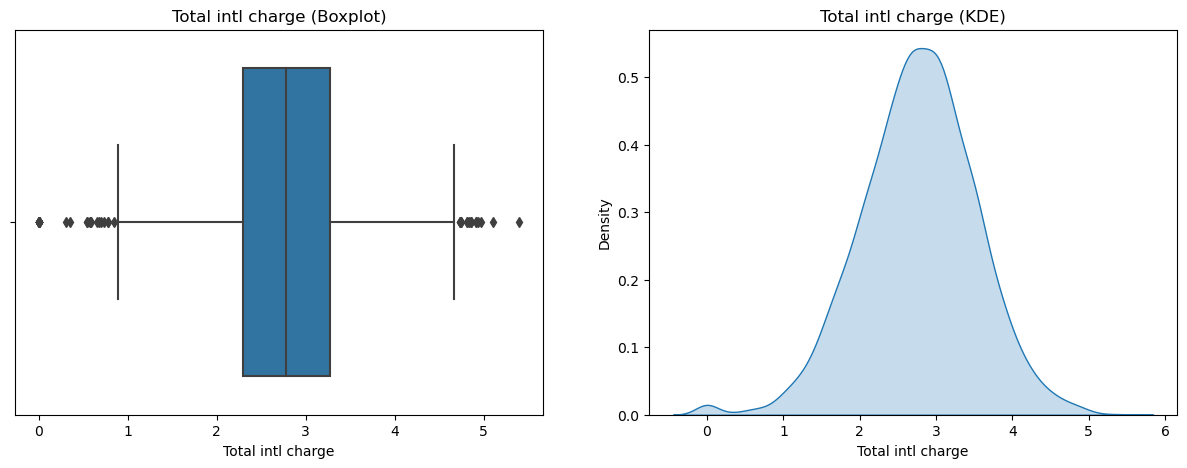

In [38]:
def numeric_univariate(column):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Description
    description = df[column].describe(include="all")
    describe_df = pd.DataFrame(description)
    describe_df.columns = ["value"]
    print(describe_df)

    # Boxplot
    sns.boxplot(ax=axes[0], data=df, x=column)
    axes[0].set_title(f"{column} (Boxplot)")

    # Distribution
    sns.kdeplot(ax=axes[1], data=df, x=column, shade=True)
    axes[1].set_title(f"{column} (KDE)")
    plt.show()

numeric_univariate("Total intl charge")

In [42]:
df_cat = df[[col for col in df.columns if df[col].dtype=="object"]]
df_cat = df_cat.drop(["Churn"], axis=1)
df_cat

,State,International plan,Voice mail plan
0,KS,No,Yes
1,OH,No,Yes
2,NJ,No,No
3,OH,Yes,No
4,OK,Yes,No
...,...,...,...
3332,AZ,No,Yes
3333,WV,No,No
3334,RI,No,No
3335,CT,Yes,No


In [43]:
df_cat["Voice mail plan"].value_counts()

No     2413
Yes     921
Name: Voice mail plan, dtype: int64

In [44]:
voice_plan_frequency = df_cat.groupby(["Voice mail plan"]).size().reset_index(name="Count")
voice_plan_frequency

,Voice mail plan,Count
0,No,2413
1,Yes,921


In [45]:
voice_plan_frequency['Count%'] = voice_plan_frequency['Count']/sum(voice_plan_frequency['Count'])*100
voice_plan_frequency

,Voice mail plan,Count,Count%
0,No,2413,72.375525
1,Yes,921,27.624475


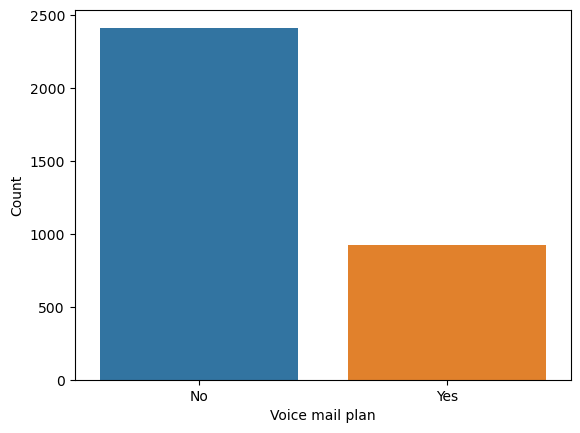

In [46]:
sns.barplot(data=voice_plan_frequency, x='Voice mail plan', y='Count')
plt.show()

In [75]:
def remove_outliers(col):
    const = 1.5
    data = df.dropna()
    q1 = np.quantile(data[col], 0.25)
    q3 = np.quantile(data[col], 0.75)
    iqr = (q3 - q1) * const
    lower = q1 - iqr
    upper = q3 + iqr
    return lower, upper

In [76]:
lower, upper = remove_outliers("Total day minutes")

In [77]:
lower

34.51250000000003

             value
count  3330.000000
mean    179.682793
std      54.490775
min       0.000000
25%     143.600000
50%     179.350000
75%     216.200000
max     350.800000


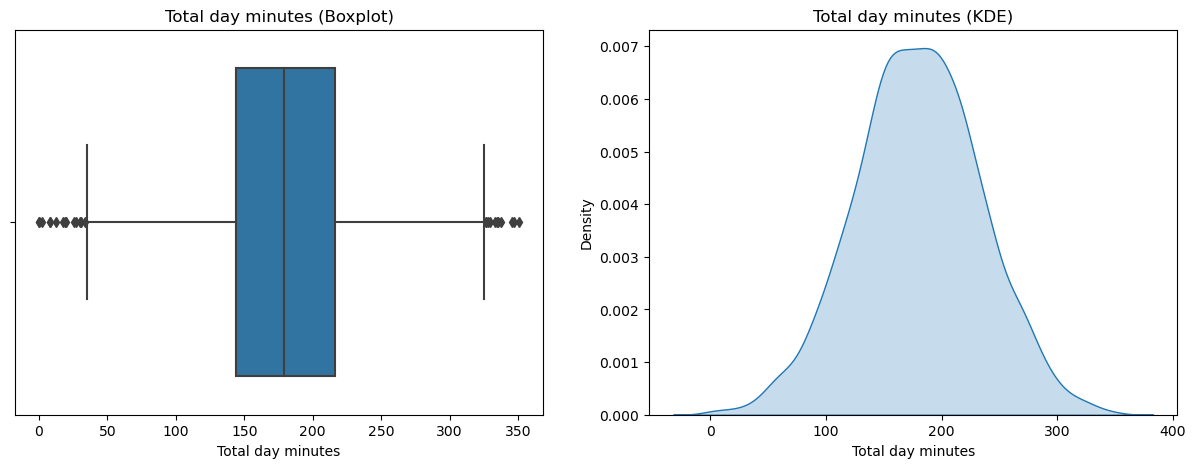

In [80]:
numeric_univariate("Total day minutes")

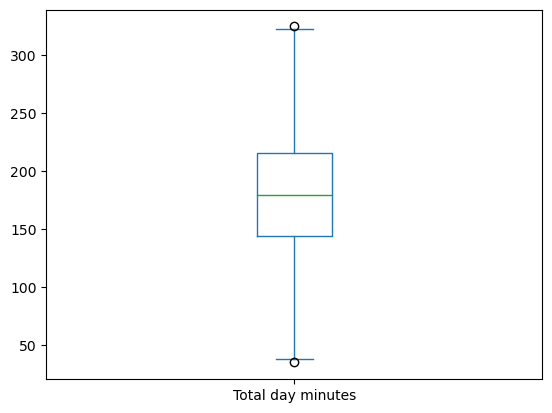

In [79]:
cleaned = df[(df["Total day minutes"] < upper) & (df["Total day minutes"] > lower)]
cleaned["Total day minutes"].plot(kind="box")
plt.show()

In [84]:
outliers = df[(df["Total day minutes"] > upper) | (df["Total day minutes"] < lower)]

In [85]:
outliers

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
15,NY,161,415,No,No,0,332.9,67.0,56.59,317.8,97.0,27.01,160.6,128,7.23,5.4,9.0,1.46,4,True
158,OH,83,415,No,No,0,337.4,120.0,57.36,227.4,116.0,19.33,153.9,114,6.93,15.8,7.0,4.27,0,True
199,TX,208,510,No,No,0,326.5,67.0,55.51,176.3,113.0,14.99,181.7,102,8.18,10.7,6.0,2.89,2,True
369,CO,154,415,No,No,0,350.8,75.0,59.64,216.5,94.0,18.40,253.9,100,11.43,10.1,9.0,2.73,1,True
609,MO,112,415,No,No,0,335.5,77.0,57.04,212.5,109.0,18.06,265.0,132,11.93,12.7,8.0,3.43,2,True
689,CO,63,415,No,Yes,32,30.9,113.0,5.25,187.0,113.0,15.90,230.8,101,10.39,8.6,7.0,2.32,1,False
745,NE,66,415,No,No,0,34.0,133.0,5.78,278.6,61.0,23.68,129.6,120,5.83,11.5,3.0,3.11,0,False
979,DE,129,510,No,No,0,334.3,118.0,56.83,192.1,104.0,16.33,191.0,83,8.59,10.4,6.0,2.81,0,True
989,NY,64,415,Yes,No,0,346.8,55.0,58.96,249.5,79.0,21.21,275.4,102,12.39,13.3,9.0,3.59,1,True
1056,OR,98,415,Yes,No,0,12.5,67.0,2.13,256.6,90.0,21.81,169.4,88,7.62,7.7,9.0,2.08,1,False


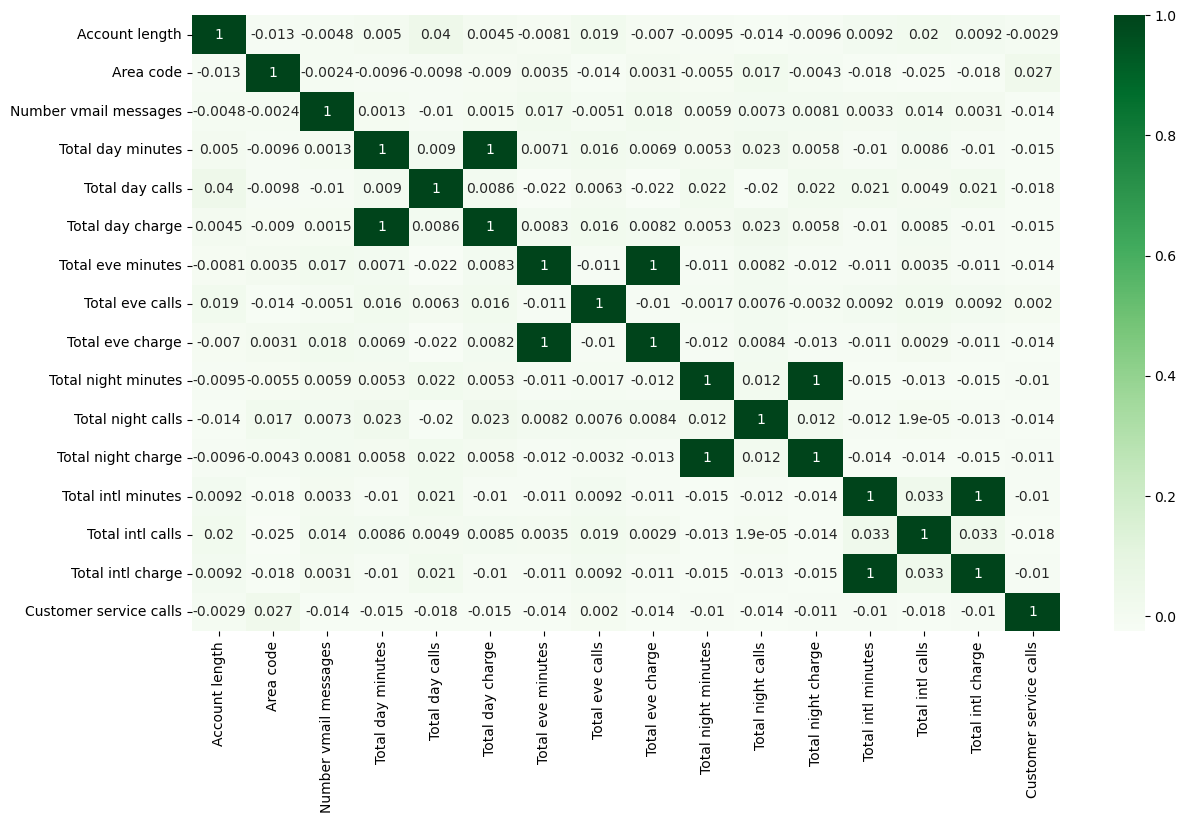

In [86]:
plt.figure(figsize=(14,8))
df.drop(["Account length", "Area code", "Churn"], axis=1)
sns.heatmap(df.corr(), annot=True, cmap="Greens")
plt.show()

In [87]:
pd.crosstab(df["Voice mail plan"], df["International plan"])

International plan,No,Yes
Voice mail plan,,
No,2182,231
Yes,828,92
